# Lab 6.04 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 4
The file production.csv contains the production cost per unit produced. That is, producing the 100th unit costs 82 EUR and producing the 600th unit costs 34 EUR.  

1. Make the following plot  

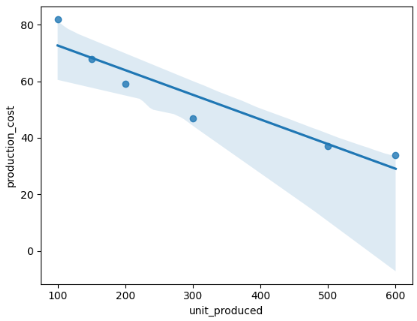



2. Based on this plot  
    1. Can you decide whether the relationship between the number of units produced and the production cost is positive / negative.   <br>
    ` Negatief — hoe meer je produceert, hoe lager de kost per eenheid`
    2. Can you decide whether the relationship between number of units produced and production costis weak / strong.  
    ` Sterk negatief verband — de punten liggen dicht bij de lijn`
    3. Can you decide whether $R$ will be between [-1,-0.5] / [-0.5, 0] / [0, 0.5] / [0.5,1].  
    ` R ligt in het interval [-1, -0.5] (sterk negatief)`
3. What is the production cost for the 400th unit?  
4. How much loss will the company incur if not a single unit is produced?  
5. How much does it cost in total to produce 1000 units  


Some answers:

- 3. the 400th unit costs 46.5051  
- 4. loss when no unit produced 81.392  
- 5. total cost for 1000 units 37739.8969

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/production.csv', delimiter=";")
df.head(20)

NameError: name 'pd' is not defined

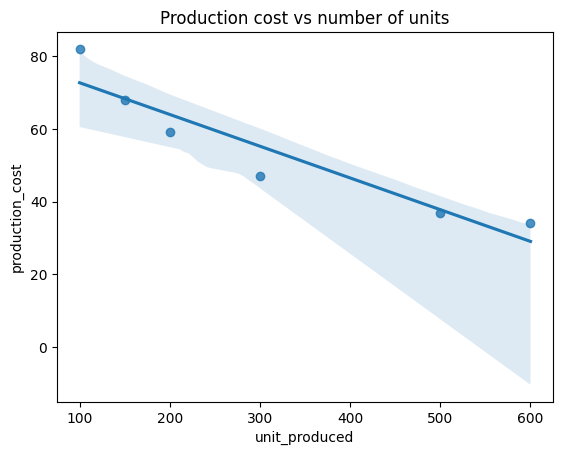

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot maken
sns.regplot(data=df, x='unit_produced', y='production_cost')

plt.title('Production cost vs number of units')
plt.xlabel('unit_produced')
plt.ylabel('production_cost')
plt.show()


### 4. Regressiemodel maken en vragen beantwoorden

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['unit_produced'].values.reshape(-1, 1)
y = df['production_cost'].values

model = LinearRegression().fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Regressievergelijking: ŷ = {intercept:.4f} + {slope:.4f} * x")


Regressievergelijking: ŷ = 81.3918 + -0.0872 * x


 ### Vraag 3 — Wat kost de 400e eenheid?

In [ ]:
cost_400 = model.predict([[400]])[0]
print(f"Kost voor 400e eenheid: {cost_400:.4f} EUR")


Kost voor 400e eenheid: 46.5052 EUR



---
Ik gebruik hier [0] om dat ene getal uit de array te halen:

``` python 
model.predict([[400]])[0]  ➜  46.5051  (als float)

```

Zonder [0] krijg je nog steeds een array, dus:

``` python 
print(model.predict([[400]]))  
# ➜ [46.5051]

```
Maar dat is:

lastig te formatteren in f-strings

niet direct bruikbaar als numerieke waarde in berekeningen

In [ ]:
loss_0_units = model.predict([[0]])[0]
print(f"Verlies bij 0 eenheden: {loss_0_units:.3f} EUR") 


Verlies bij 0 eenheden: 81.392 EUR


### Vraag 5 — Totale kost voor 1000 eenheden?

In [ ]:
units = np.arange(1, 1001).reshape(-1, 1)
costs = model.predict(units)

total_cost = costs.sum()
print(f"Totale kost voor 1000 eenheden: {total_cost:.4f} EUR")  


Totale kost voor 1000 eenheden: 37739.8969 EUR
